Decision Tree to Predict Customer Churn
It is a supervised machine learning model because
Classification (Discrete Output)
DecisionTreeClassifier 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

In [2]:
# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            100 non-null    int64 
 1   Age                   100 non-null    int64 
 2   MonthlyCharge         100 non-null    int64 
 3   CustomerServiceCalls  100 non-null    int64 
 4   Churn                 100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [5]:
df.head()

,CustomerID,Age,MonthlyCharge,CustomerServiceCalls,Churn
0,1,20,50,1,No
1,2,25,60,2,No
2,3,30,70,3,Yes
3,4,35,80,4,No
4,5,40,90,0,Yes


In [6]:
# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

In [8]:
X.head()

,Age,MonthlyCharge,CustomerServiceCalls
0,20,50,1
1,25,60,2
2,30,70,3
3,35,80,4
4,40,90,0


In [9]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [ ]:
# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
#test_size=0.3 means 30% of the data will be used for testing
#random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Making predictions on the test set
y_pred = clf.predict(X_test)

In [13]:
# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 1.0


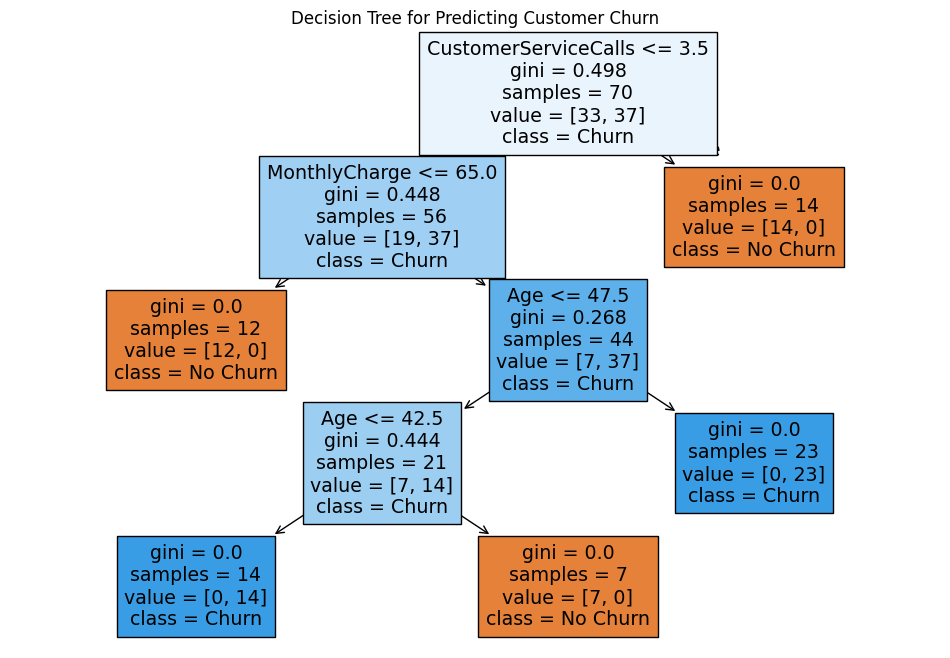

In [14]:
# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()